# Porto Seguro Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest, circmean, skew
# from scipy.stats import circmean

import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

import os
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
# FOLDER PATH
folder_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'


# DATA RAW
raw_data_path = os.path.join(folder_path, 'pnboia_raw_data-renamed.csv')
buoys_df_raw = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# DATA SITE
raw_data_path = os.path.join(folder_path, 'pnboia_site_data-renamed.csv')
buoys_df_site = pd.read_csv(raw_data_path, parse_dates=True)
buoys_df_site['Datetime'] = pd.to_datetime(buoys_df_site['Datetime'])
buoys_df_site.set_index(['buoy','Datetime'], inplace=True)

# LIMITS
# Limits from pnboia_limits_tests.py
porto_seguro_lims = pnboia_limits_tests.porto_seguro

In [3]:
buoys_df_raw.index.levels[0].unique()

Index(['cabofrio', 'cabofrio2', 'fortaleza', 'itaguai', 'itajai_0', 'itaoca',
       'minuano', 'niteroi', 'ocas', 'porto_seguro', 'recife', 'rio_grande',
       'santos', 'vitoria'],
      dtype='object', name='buoy')

## Preliminary Filtering

- Filter bad period (> '2013-03')

In [4]:
# filter data with

porto_seguro = filter_data(data=buoys_df_raw,
                    buoy='porto_seguro',
                    limits=porto_seguro_lims,
                    outlier_check=False,
                    t_continuity_check=False)

porto_seguro = porto_seguro.drop(columns=porto_seguro.filter(regex='dir|head|spread').columns)

# Filter bad period
# porto_seguro = porto_seguro.loc[:'2017-05']

# Filter bad srad data
# porto_seguro = porto_seguro.where(porto_seguro['srad'] < 1500)

# # Drop all-nans columns
# porto_seguro.dropna(how='all',axis=1, inplace=True)

mis_value_check done.
range_check done.


## Statistical Analysis

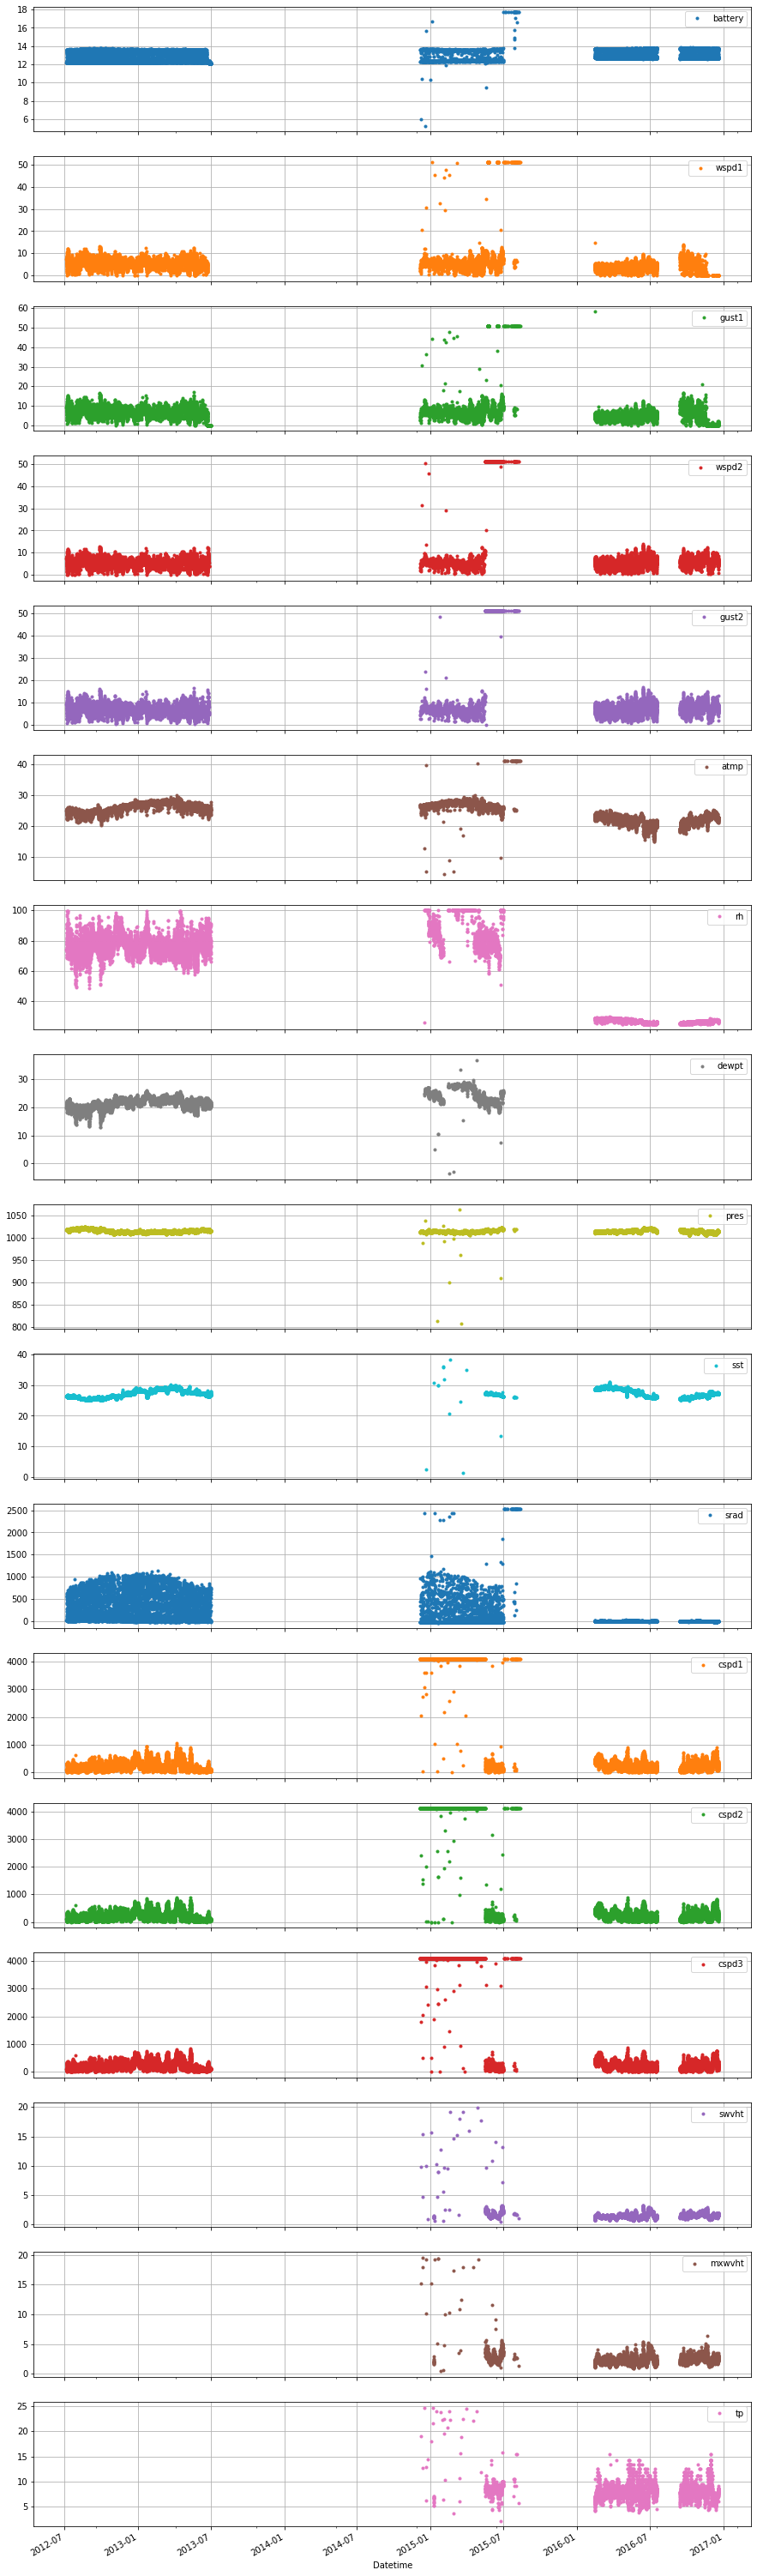

In [5]:
porto_seguro.plot(subplots=True, marker='.', linestyle='None', grid=True,figsize=(15,60));

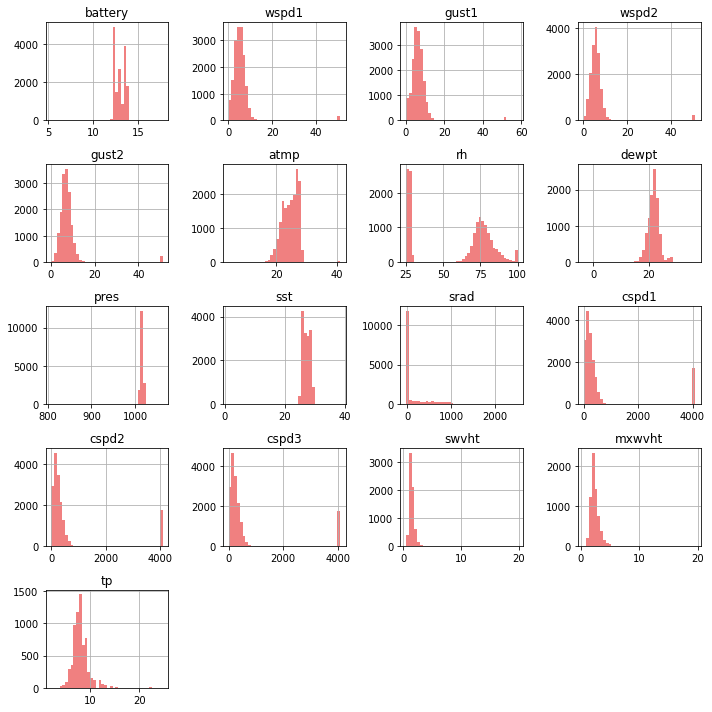

In [6]:
porto_seguro.hist(bins=40, color='lightcoral', figsize=(10,10));
plt.tight_layout()

## Limits generation and data filtering

In [7]:
# Generated lims
porto_seguro_out_lims_df_3 = gen_outlier_lim(porto_seguro, buoy_name='porto_seguro', std_factor=3).round(1)

# Generate lims dict
porto_seguro_out_lims_dict_3 = manual_outlier_lims(porto_seguro_out_lims_df_3, buoy_name='porto_seguro')

# filter data with
porto_seguro3 = filter_data(data=porto_seguro,
                    buoy='porto_seguro',
                    limits=porto_seguro_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=porto_seguro_out_lims_dict_3)

outlier_check done.


In [8]:
# Generated lims
porto_seguro_out_lims_df_5 = gen_outlier_lim(porto_seguro, buoy_name='porto_seguro', std_factor=5).round(1)

# Generate lims dict
porto_seguro_out_lims_dict_5 = manual_outlier_lims(porto_seguro_out_lims_df_5, buoy_name='porto_seguro')

# filter data with
porto_seguro2 = filter_data(data=porto_seguro,
                    buoy='porto_seguro',
                    limits=porto_seguro_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=porto_seguro_out_lims_dict_5)

outlier_check done.


In [9]:
porto_seguro_out_lims_df_3

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,5.5,4.9,3.0,14.7,0.0,20.2
gust1,6.6,5.0,3.0,15.0,0.0,21.6
wspd2,6.3,6.1,3.0,18.3,0.0,24.6
gust2,7.6,6.0,3.0,18.1,0.0,25.7
atmp,24.7,2.7,3.0,8.0,16.7,32.6
rh,59.7,25.1,3.0,75.2,0.0,134.9
dewpt,21.8,2.1,3.0,6.3,15.5,28.2
pres,1015.7,4.0,3.0,12.0,1003.7,1027.7
sst,27.2,1.3,3.0,3.8,23.5,31.0


In [10]:
porto_seguro_out_lims_df_5

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,5.5,4.9,5.0,24.5,0.0,29.9
gust1,6.6,5.0,5.0,25.0,0.0,31.5
wspd2,6.3,6.1,5.0,30.5,0.0,36.8
gust2,7.6,6.0,5.0,30.2,0.0,37.8
atmp,24.7,2.7,5.0,13.3,11.3,38.0
rh,59.7,25.1,5.0,125.4,0.0,185.1
dewpt,21.8,2.1,5.0,10.6,11.3,32.4
pres,1015.7,4.0,5.0,20.0,995.7,1035.7
sst,27.2,1.3,5.0,6.3,20.9,33.5


# Testing generated limits

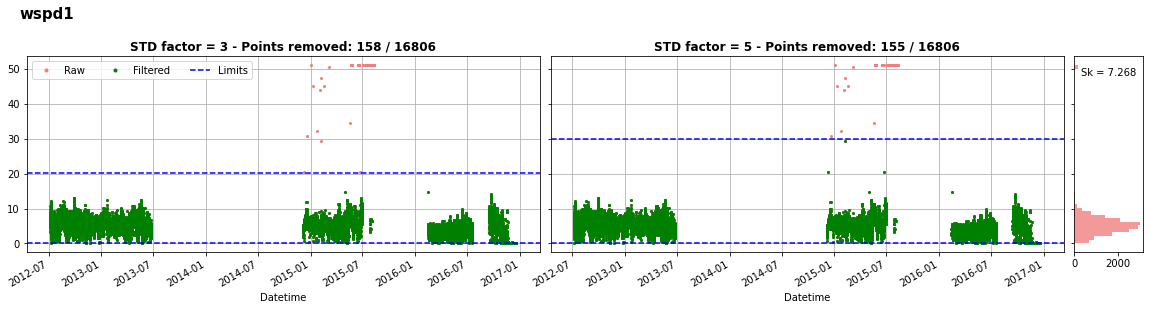

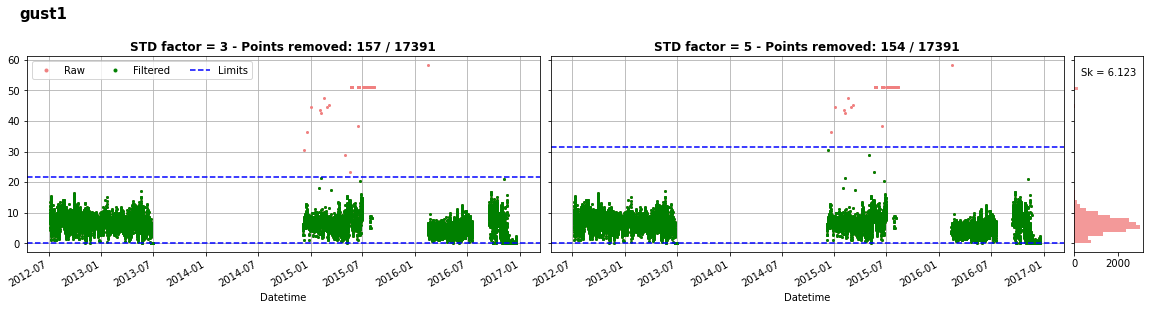

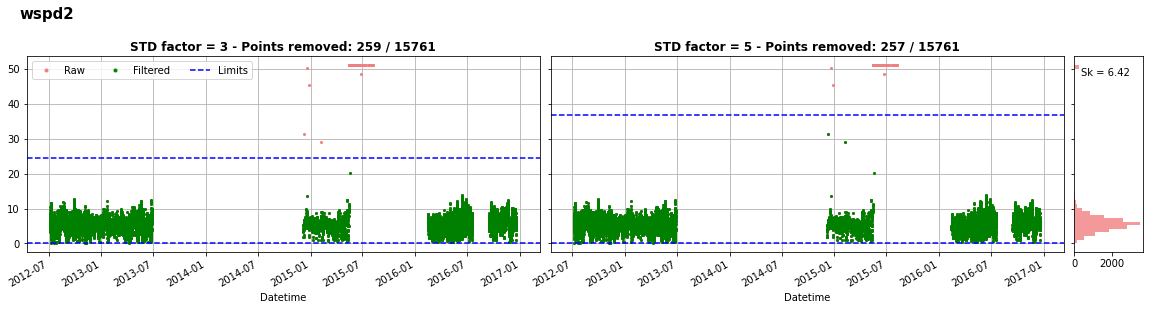

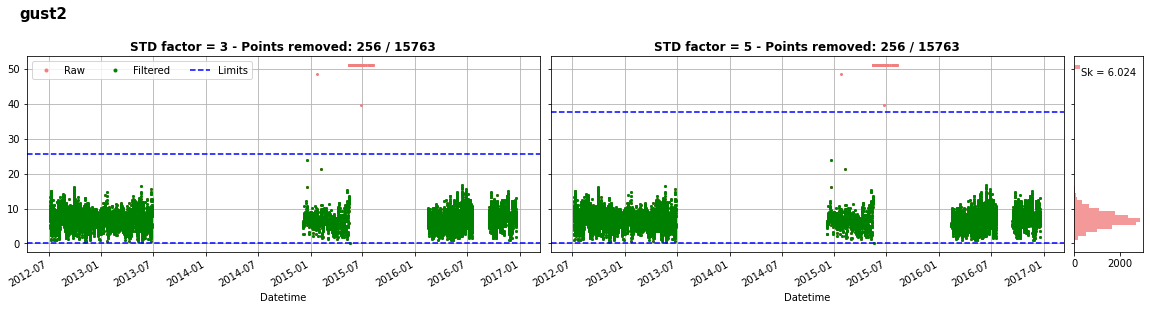

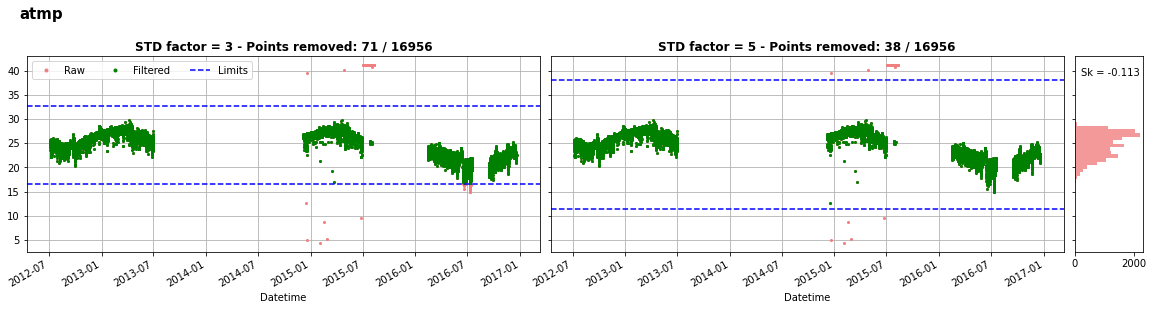

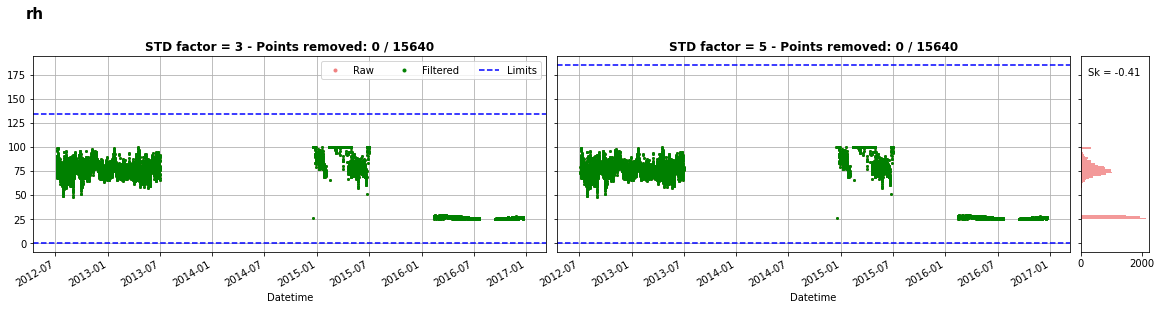

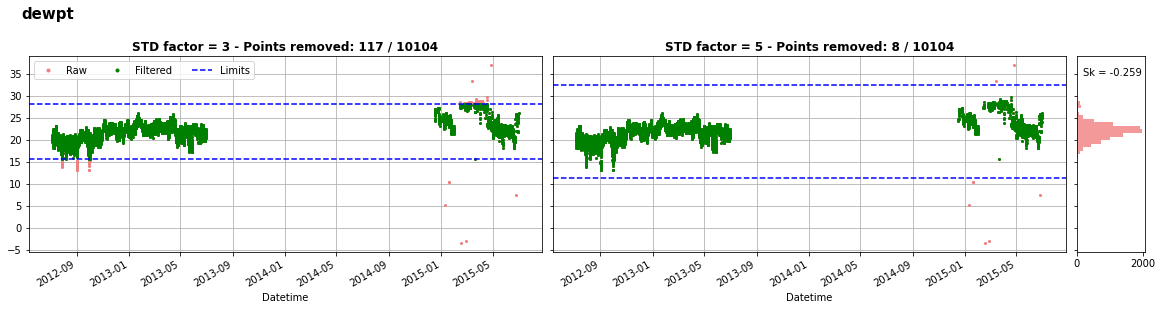

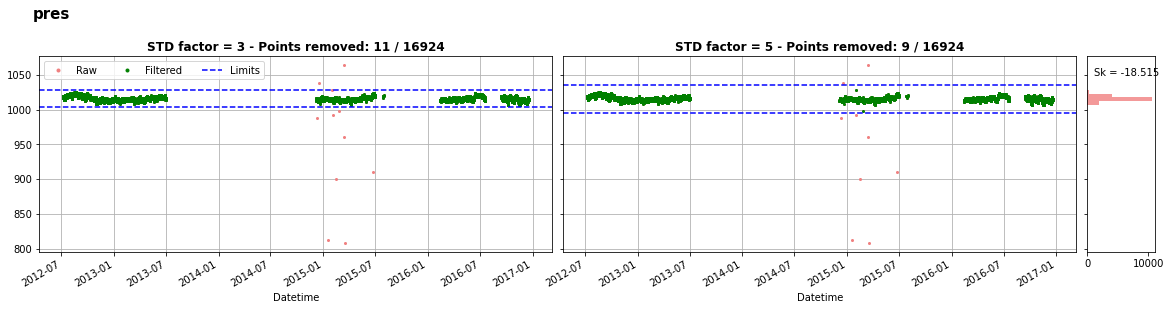

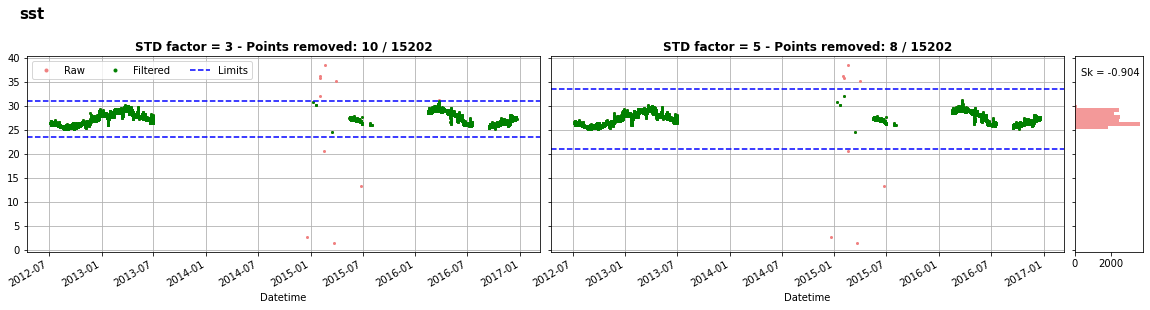

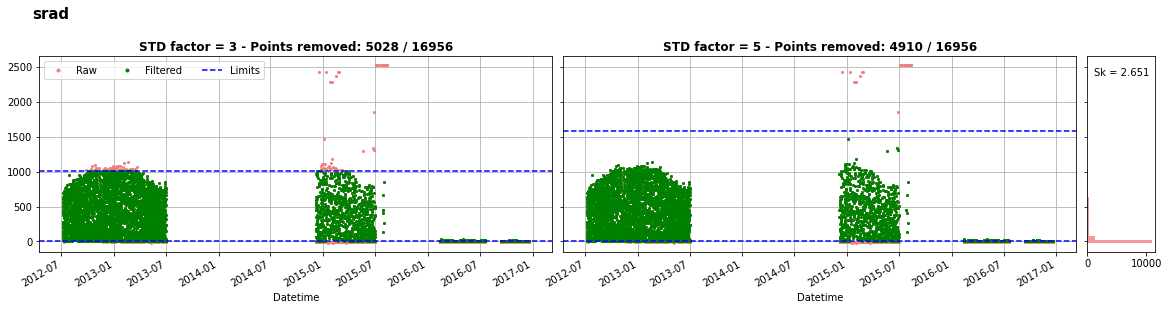

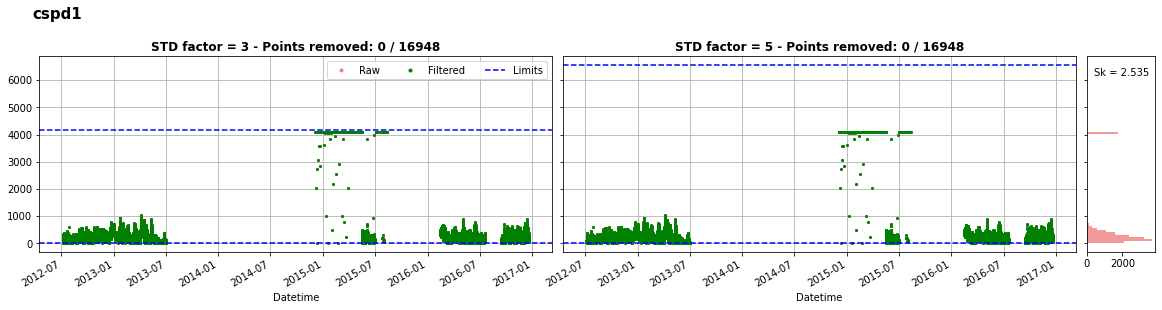

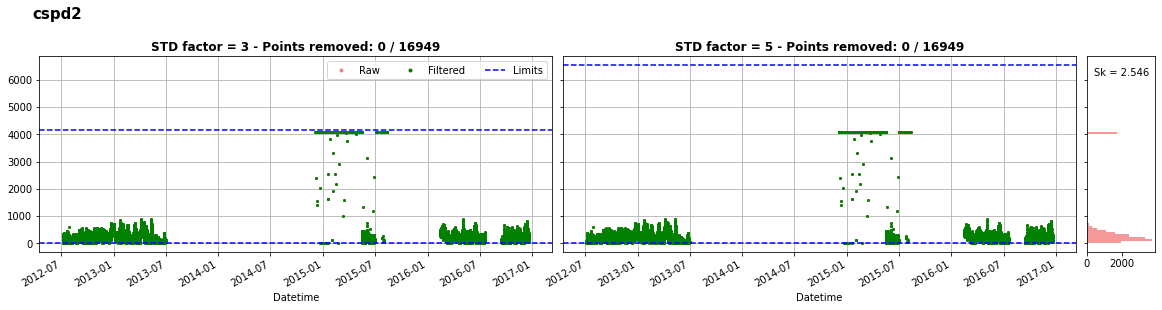

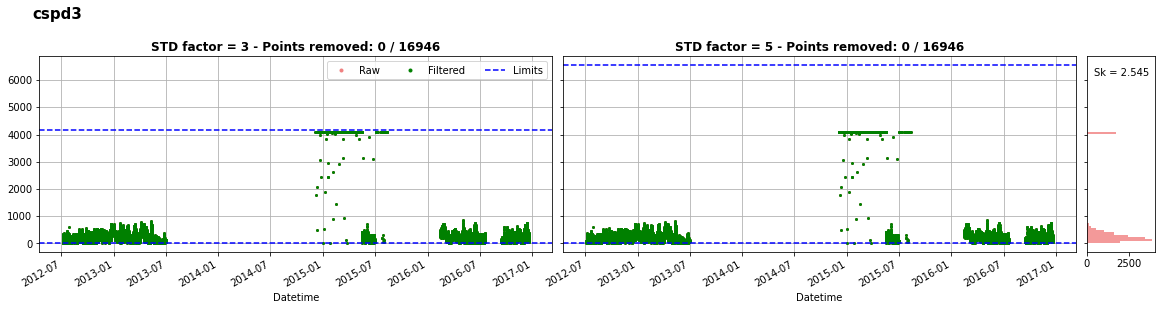

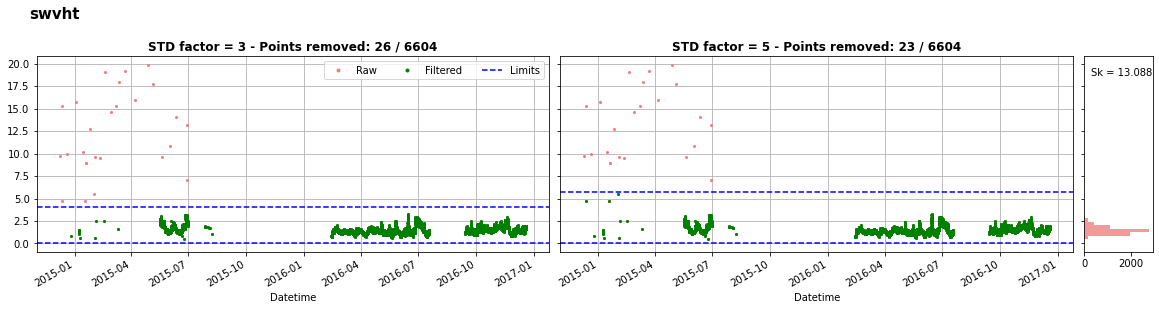

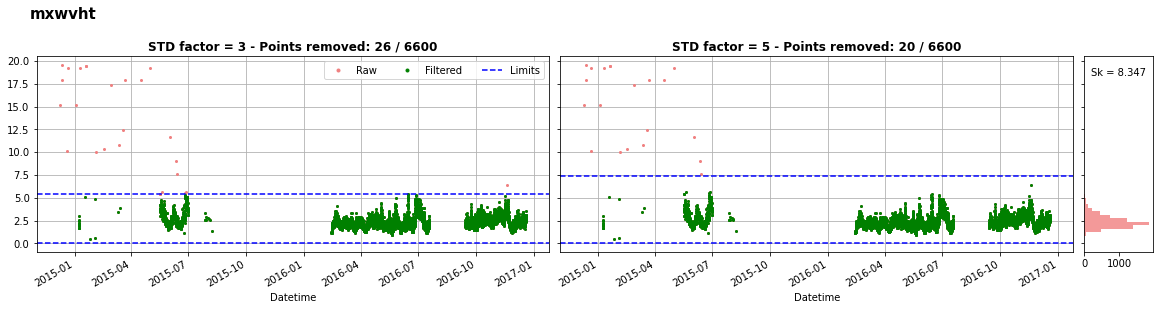

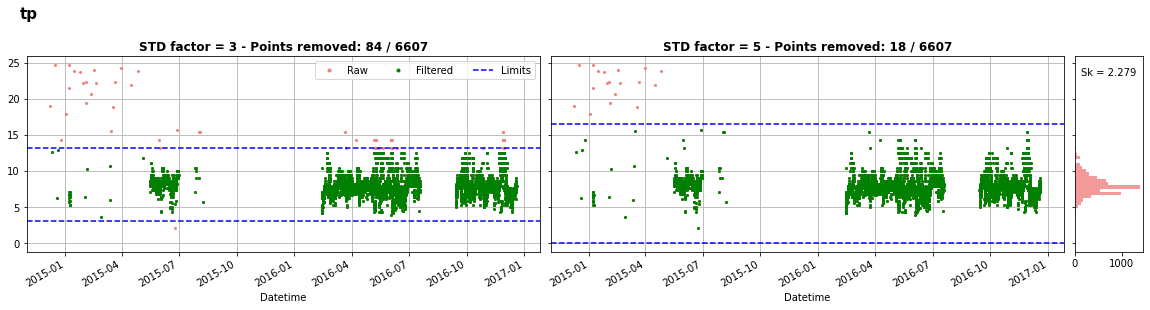

In [11]:
parameters = porto_seguro.columns[1:]

for param in parameters:
    plot_comparison(factor1=3, 
                    factor2=5, 
                    data=porto_seguro,
                    limits=porto_seguro_lims,
                    buoy='porto_seguro',
                    parameter=param)
    plt.show()

## Factors determination

Factors are determined based on:
- Natural distribution of the parameter
- Artificial distribution (i.e. shift as a consequence of fail data) of the parameter

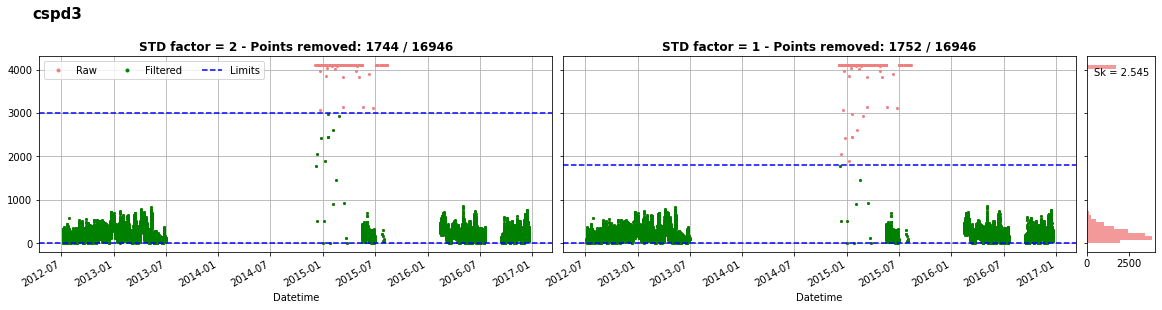

In [39]:
param = 'cspd3'
plot_comparison(factor1=2, 
                    factor2=1, 
                    data=porto_seguro,
                    limits=porto_seguro_lims,
                    buoy='porto_seguro',
                    parameter=param)
plt.show()

In [40]:
factors = {
    "swvht": 5,
    "mxwvht": 5,
    "tp": 6,
    "wspd1": 3,
    "gust1": 3,
    "wspd2": 3,
    "gust2": 3,
    "atmp": 5,
    "rh": 2,
    "srad": 4,
    "pres": 4.5,
    "dewpt": 5,
    "sst": 5,
    "tp": 5,
    "cspd1": 1,
    "cspd2": 1,
    "cspd3": 1,
    }

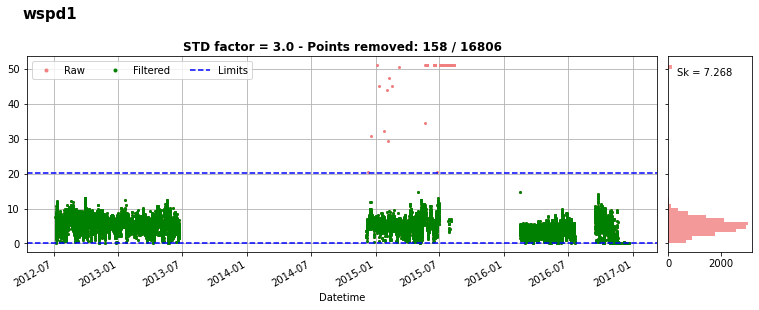

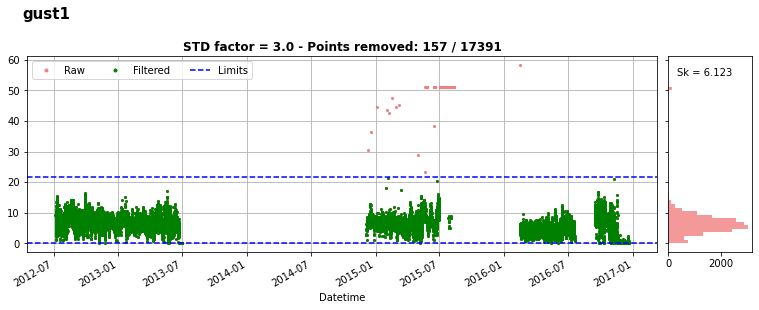

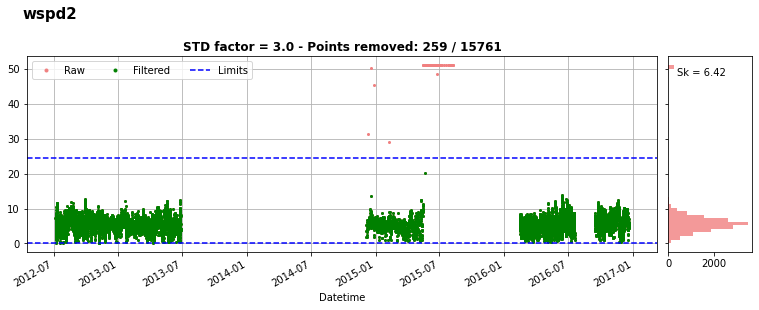

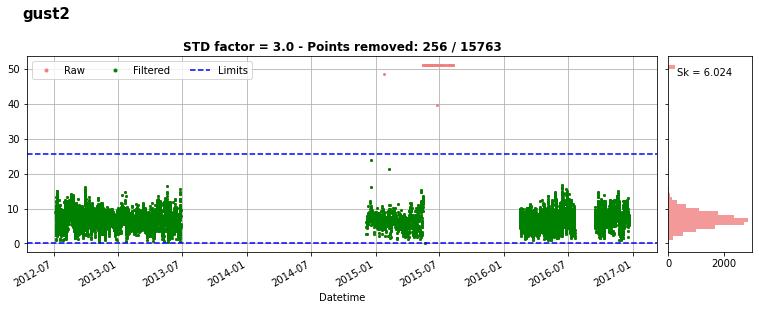

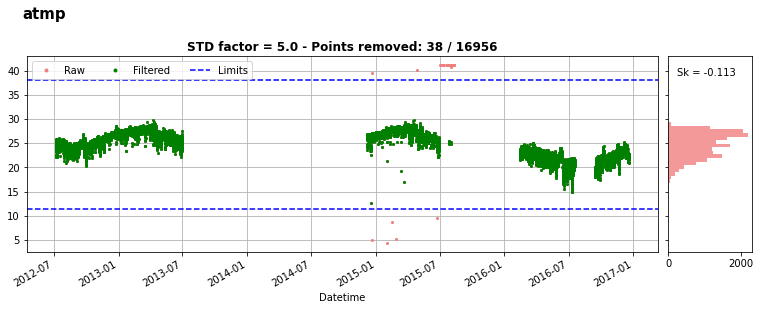

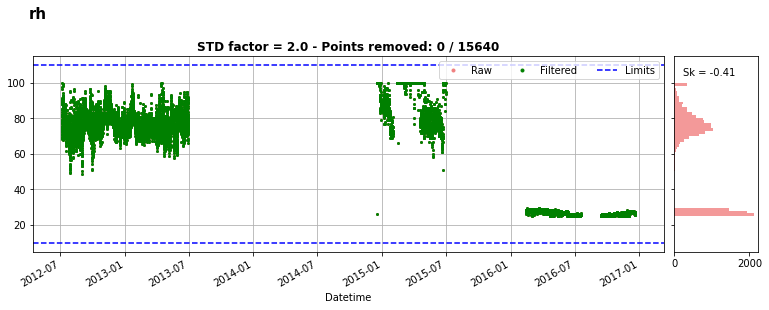

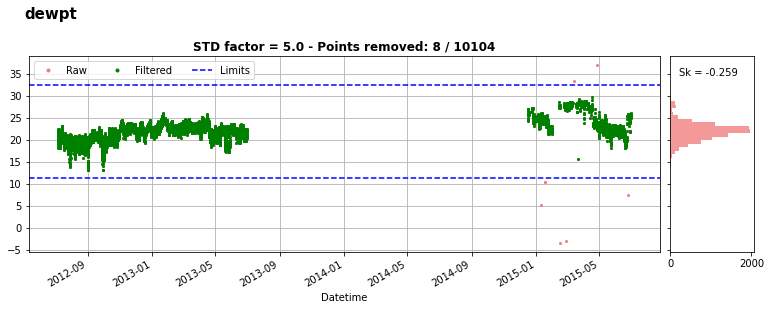

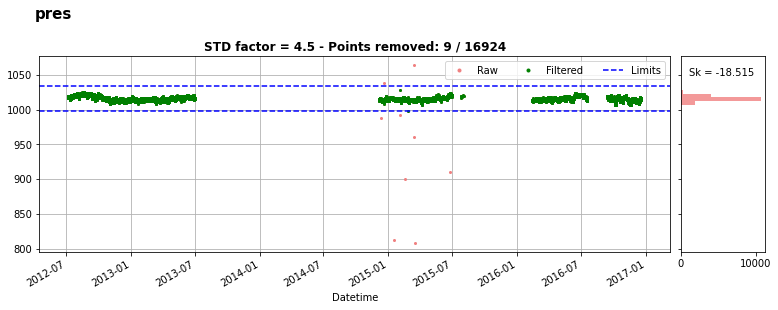

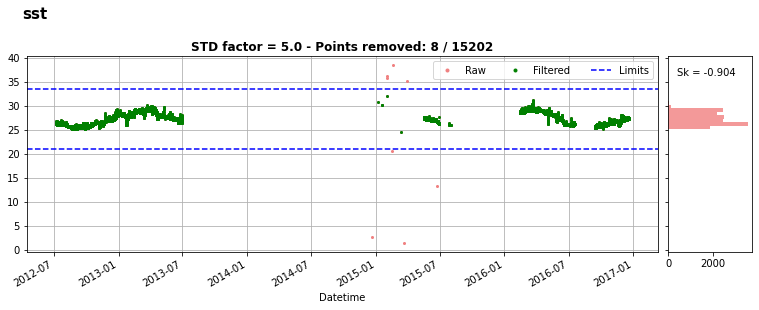

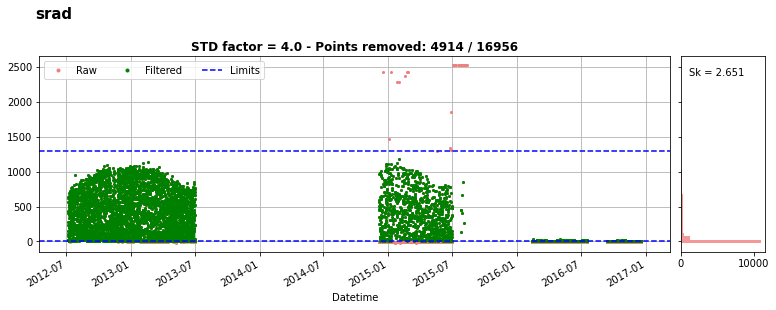

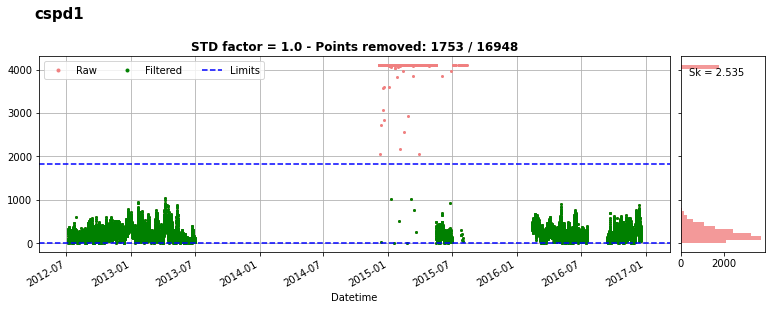

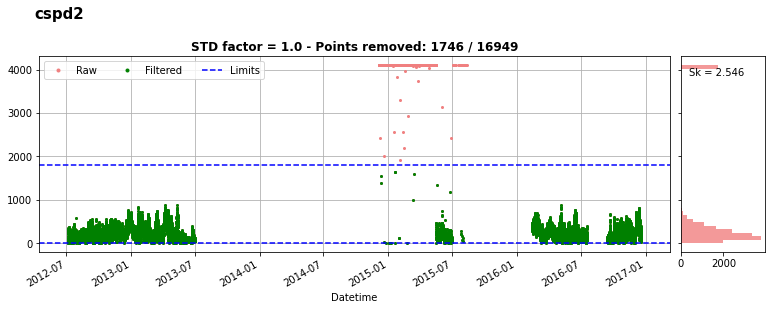

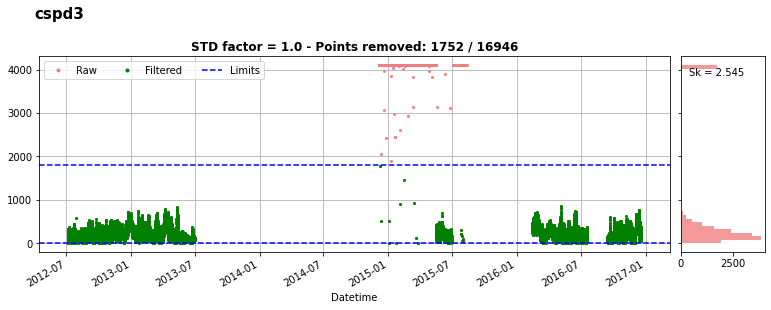

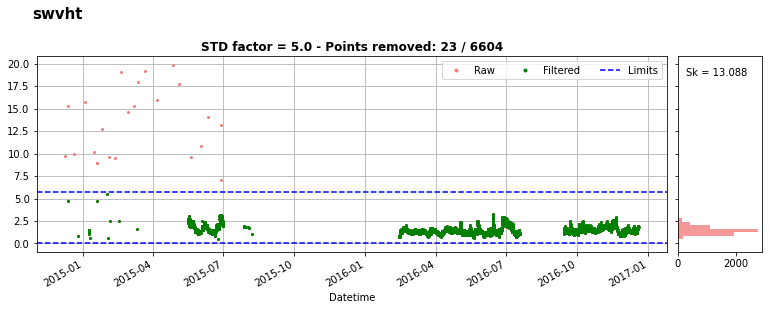

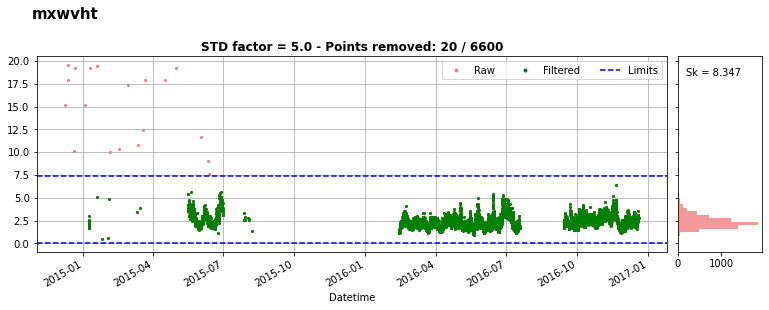

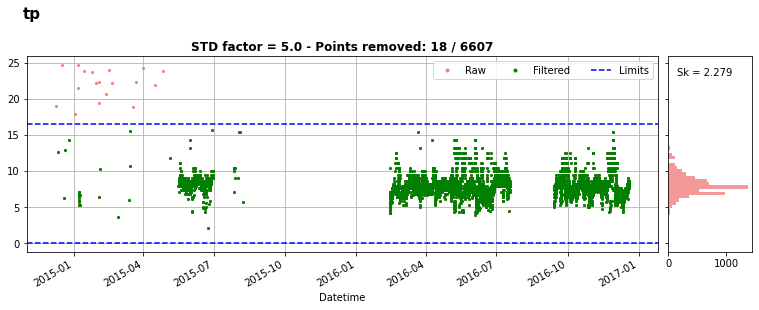

In [41]:
# FILTERING WITH DEFINITIVE FACTORS
porto_seguro_notdir = porto_seguro.drop(columns=porto_seguro.filter(regex='dir|head|spread').columns)
parameters = porto_seguro_notdir.columns[1:]

for param in parameters:

    plot_filtering(factor=factors,
                    data=porto_seguro,
                    limits=porto_seguro_lims,
                    buoy='porto_seguro',
                    parameter=param)
    plt.show()

In [42]:
# DATAFRAME WITH DEFINITIVE FACTORS AND OUTLIER LIMITS

factors = {
    "swvht": 5,
    "mxwvht": 5,
    "tp": 6,
    "wspd1": 3,
    "gust1": 3,
    "wspd2": 3,
    "gust2": 3,
    "atmp": 5,
    "rh": 2,
    "srad": 4,
    "pres": 4.5,
    "dewpt": 5,
    "sst": 5,
    "tp": 5,
    "cspd1": 1,
    "cspd2": 1,
    "cspd3": 1,
    }

porto_seguro_out_lims_df = gen_outlier_lim(data=porto_seguro,
                                     buoy_name='porto_seguro',
                                     std_factor=factors).round(1)

In [43]:
porto_seguro_out_lims_df

,mean,std,factor,std*factor,lower_lim,upper_lim
param,,,,,,
wspd1,5.5,4.9,3.0,14.7,0.0,20.2
gust1,6.6,5.0,3.0,15.0,0.0,21.6
wspd2,6.3,6.1,3.0,18.3,0.0,24.6
gust2,7.6,6.0,3.0,18.1,0.0,25.7
atmp,24.7,2.7,5.0,13.3,11.3,38.0
rh,59.7,25.1,2.0,50.1,9.6,109.9
dewpt,21.8,2.1,5.0,10.6,11.3,32.4
pres,1015.7,4.0,4.5,18.0,997.7,1033.7
sst,27.2,1.3,5.0,6.3,20.9,33.5


In [44]:
# DICTIONARY WITH DEFINITIVE OUTLIER LIMITS
porto_seguro_out_lims_dict = manual_outlier_lims(porto_seguro_out_lims_df, buoy_name='porto_seguro')

In [45]:
porto_seguro_out_lims_dict

{'wspd1': [0.0, 20.2],
 'gust1': [0.0, 21.6],
 'wspd2': [0.0, 24.6],
 'gust2': [0.0, 25.7],
 'atmp': [11.3, 38.0],
 'rh': [9.6, 109.9],
 'dewpt': [11.3, 32.4],
 'pres': [997.7, 1033.7],
 'sst': [20.9, 33.5],
 'srad': [0.0, 1298.5],
 'cspd1': [0.0, 1818.2],
 'cspd2': [0.0, 1813.3],
 'cspd3': [0.0, 1812.5],
 'swvht': [0.0, 5.7],
 'mxwvht': [0.0, 7.4],
 'tp': [0.0, 16.5]}

In [46]:
# FILTERED DATA WITH DEFINITIVE OUTLIER LIMITS
porto_seguro_definitive = filter_data(data=buoys_df_raw,
                    buoy='porto_seguro',
                    limits=porto_seguro_lims,
                    mis_value_check=False,
                    range_check=False,
                    t_continuity_check=False,
                    outlier_limits=porto_seguro_out_lims_dict)

outlier_check done.
